In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk2-task2-salmon.ipynb")

# Task 2: Wrangling Alaska salmon catch data 

## Instructions 

- First, update the following cell to have a link to *your* Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/aakikip/eds220-hwk2


- Review the [complete rubric for this task](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0) before starting.

- **Meaningful commits should be made every time you finish a major step.** We'll check your repository and view the commit history.

- **Every code cell should have a comment.** Err on the side of commenting too much for now. Comments should follow best practices.

- **Do not update the top cell with the `otter` import**, this is used internally for grading.

## Acknowledgments

This exercise is based on the [Cleaning and Wrangling Data in R lesson by the NCEAS Learning Hub](https://learning.nceas.ucsb.edu/2023-06-delta/session_11.html).


> Halina Do-Linh, Carmen Galaz García, Matthew B. Jones, Camila Vargas Poulsen. 2023. Open Science Synthesis training Week 1. NCEAS Learning Hub & Delta Stewardship Council.


## About the data

In this task you will use simplified data from the Alaska Department of Fish & Game containing commercial salmon catch data from 1878 to 1997. The original data can be accessed from the KNB repository:

> [Mike Byerly. (2016). Alaska commercial salmon catches by management region (1886-1997).](https://knb.ecoinformatics.org/view/df35b.304.2) Gulf of Alaska Data Portal. df35b.304.2.

The simplified dataset is in CSV format in the homework repository and has the following columns:

| Column | Description |
| ------ | ----------- | 
| Regions | Region code |
| Year | Year fish were caught |
| notesRegCode | Notes and comments |
| Species | Species of salmon caught |
| Catch | Commercial catches of salmon species (in thousands of fish) |

## COMPLETE WORKFLOW

You will use the next code cell to complete the last exercise in the task. Leave it blank for now. 

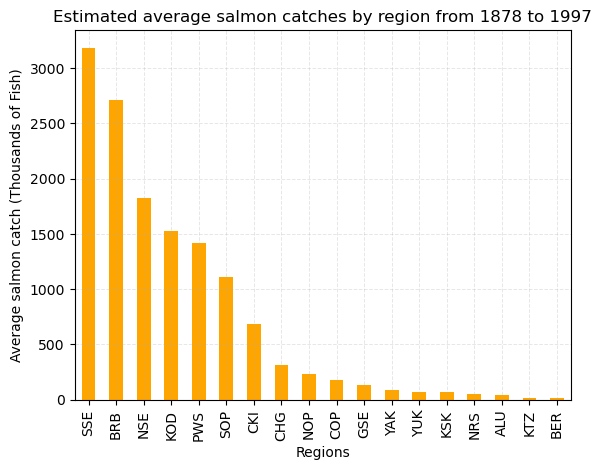

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataframe
catch_data = pd.read_csv('data/salmon_data.csv')

# Find all rows where the 'Catch' column equals 'I', select specified columns and update values
catch_data['Catch'] = catch_data['Catch'].replace('I', '1')

# Update the 'Catch' column to be of type int64
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Convert to a DataFrame with the average salmon catch per region and sort the values in ascending order
avg_region = catch_data.groupby('Region')['Catch'].mean().to_frame().sort_values(by = 'Catch', ascending = False)

# Data visualization of estimated average salmon catches by region from 1878 to 1997
avg_region.plot(kind='bar',
                title='Estimated average salmon catches by region from 1878 to 1997',
                xlabel='Regions',
                ylabel='Average salmon catch (Thousands of Fish)',
                color='orange',
                legend=False)
plt.grid(True, alpha = 0.3, linestyle = '--', linewidth = 0.7)

## 1

a. Uset this code cell to import the data from the `salmon_data.csv` as `catch_data`. Look at the head of the dataframe. 

<!-- BEGIN QUESTION -->



In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the dataframe
catch_data = pd.read_csv('data/salmon_data.csv')

# Check the head, first five rows of dataframe
catch_data.head()

,Region,Year,notesRegCode,Species,Catch
0,SSE,1886,NaN,Chinook,0
1,SSE,1887,NaN,Chinook,0
2,SSE,1888,NaN,Chinook,0
3,SSE,1889,NaN,Chinook,0
4,SSE,1890,NaN,Chinook,0


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

b. Use this code cell to make some other preliminary data exploration of your choosing.

In [4]:
# Check dimensions of the DataFrame
catch_data.shape

(8540, 5)

In [5]:
# Check summary of the DataFrame
catch_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8540 entries, 0 to 8539
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Region        8540 non-null   object
 1   Year          8540 non-null   int64 
 2   notesRegCode  1415 non-null   object
 3   Species       8540 non-null   object
 4   Catch         8540 non-null   object
dtypes: int64(1), object(4)
memory usage: 333.7+ KB


In [6]:
# Check total number of missing values per column
catch_data.isnull().sum()

Region             0
Year               0
notesRegCode    7125
Species            0
Catch              0
dtype: int64

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

c. Use this markdown cell to explain why you decided to do the exploration in c. and what information you obtained from doing it.

I chose to explore `.shape`, `.info` and `.isnull().sum()`
- I explored `.shape` because it returns the dimensions of the DataFrame as a tuple. This tuple provides the number of rows and columns in the DataFrame. The first element of the tuple represents the number of rows and the second element represents the number of columns.
- I explored `.info` because it gives a summary of the DataFrame. It gives information on range index, total number of columns, column names, column data types, memory usage, and the number of non-null entries.
- I explored `.isnull().sum()` because it counts the number of missing or null values in each column of a DataFrame.

<!-- END QUESTION -->

## 2
In the next cell:

a. Store the unique values of the `notesRegCode` column in the `notes_unique` variable. 

In [7]:
# Use .unique() to check unique values
notes_unique = catch_data['notesRegCode'].unique()
print(notes_unique)

[nan 'Includes Yakutat catches' 'Yakutat catch included in No SE AK catch'
 'Estimated from canned production, probably sockeye' 'No fishery'
 'Bering River catches included in Copper River catches'
 'Includes Bering River catches; estimated from canned'
 'Includes Bering River catches'
 'Coho and pink catch estimated from canned production'
 'Includes Bering River; coho and pink estimated fro canned'
 'Pink catch estimated from canned'
 'Includes Bering River; coho pink and chum estimated from canned'
 'Includes Bering River; pink estimated from canned'
 'Includes Bering River; pink and chum estimated from canned'
 'Includes Copper River catches'
 'Includes Copper River catches; coho catch porbably mostly pinks'
 'Eshamy District only' 'Estimated from canned; excludes Resurrection Bay'
 'Estimated from canned production' 'No Resurrection Bay fishery'
 'Resurrection bay contribution estimated from canned production'
 'No reported catch'
 'Sockeye and pink and 9922 chum from Port Claren

In [8]:
grader.check("q2a")

q2a results: All test cases passed!

b. Update the dataframe so it doesn't include the `notesRegCode` column. Verify the column is no longer in the dataframe.

In [9]:
# Drop the column 'notesRegCode'
catch_data = catch_data.drop(columns = ['notesRegCode'])
print(catch_data)

     Region  Year  Species Catch
0       SSE  1886  Chinook     0
1       SSE  1887  Chinook     0
2       SSE  1888  Chinook     0
3       SSE  1889  Chinook     0
4       SSE  1890  Chinook     0
...     ...   ...      ...   ...
8535    NOP  1993     Chum   135
8536    NOP  1994     Chum    84
8537    NOP  1995     Chum    99
8538    NOP  1996     Chum    68
8539    NOP  1997     Chum    97

[8540 rows x 4 columns]


In [10]:
grader.check("q2b")

q2b results: All test cases passed!

<!-- BEGIN QUESTION -->

## 3
Does each column have the expected data type? Use this code cell to obtain this information and write your answer in the next markdown cell.


All columns `Region`, `Year` and `Species` have the expected data type except column `Catch`. 

- The column `Region` is an object. It is strings rather than numbers.
- The column `Year` is an integer.
- The column `Species` is an object. It is strings rather than numbers.
- The column `Catch` is object. This should be an integer (int64).

In [11]:
# Check data types of the DataFrame
catch_data.dtypes

Region     object
Year        int64
Species    object
Catch      object
dtype: object

<!-- END QUESTION -->

## 4 
The following cell shows a first attempt at updating the `Catch` column to be of data type `int64` instead of `object`. Converting from one data type to another is often called **casting**. 

To do it we use the [`astype()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.astype.html) method for `pandas.Series`. The `astype()` method does not modify the `pandas.Series` in place.

Run the next cell and read the end of the error message closely.

In [12]:
catch_data['Catch'].astype('int64')

ValueError: invalid literal for int() with base 10: 'I'

## 5 

The previous error tells us there is a value 'I' (as in the letter 'I') that could not be converted to integer type.  It turns out the original data set was created from a PDF which was automatically converted into a CSV file and this 'I' vlaue should be 1.

In the next cell find the row(s) causing this issue. Show the filtered row(s) as the output. Store your answer in the `catch_I` variable. `catch_I` should have one observation and contain the following columns: Region, Year, Species, Catch. It should contain the original index number in order to pass the test. 

In [13]:
# Filter to find all rows where the 'Catch' column equals 'I' and select specified columns
catch_I = catch_data[catch_data['Catch'] == 'I'][['Region', 'Year', 'Species', 'Catch']]
catch_I

,Region,Year,Species,Catch
400,GSE,1955,Chinook,I


In [14]:
grader.check("q5")

q5 results: All test cases passed!

## 6
In the next cell:

1. Update the value of I to 1.
2. Access the row you updated to verify the value was changed and store this singe row in the `catch_1` variable. 

<!-- BEGIN QUESTION -->



In [15]:
# Update the value of 'I' to '1'
catch_data['Catch'] = catch_data['Catch'].replace('I', '1')

# Access the updated row and store it in catch_1
catch_1 = catch_data.loc[[400]]
catch_1

,Region,Year,Species,Catch
400,GSE,1955,Chinook,1


<!-- END QUESTION -->

## 7
In the next cell:

1. Update the `Catch` column in `catch_data` to be of type `int64`.
2. Confirm you have updated the data type. Store the type of the `catch` column in the `catch_column_type` variable.

In [16]:
# Update the 'Catch' column to be of type int64
catch_data['Catch'] = catch_data['Catch'].astype('int64')

# Confirm the data type
catch_column_type = catch_data['Catch'].dtype
catch_column_type

dtype('int64')

In [ ]:
grader.check("q7")

<!-- BEGIN QUESTION -->

## 8
Create a data frame with the average salmon catch per region. HINT: use `groupby()`. Store your dataframe in new variable called `avg_region`


In [17]:
# Convert to DataFrame with average salmon catch per region
avg_region = catch_data.groupby('Region')['Catch'].mean().to_frame()
avg_region

,Catch
Region,
ALU,40.383908
BER,16.372549
BRB,2709.796491
CHG,315.487273
CKI,683.571429
COP,179.223404
GSE,133.841463
KOD,1528.350000
KSK,67.642353


In [18]:
grader.check("q8")

q8 results: All test cases passed!

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 9 

Use the dataframe you created in 8 to make a bar graph of the estimated average salmon catches by region from 1878 to 1997. The bars in the graph should be ordered by magnitude (increasing or decreasing is ok). Add a title  to your graph and update the axes labels if needed (check the units for the salmon catch). 

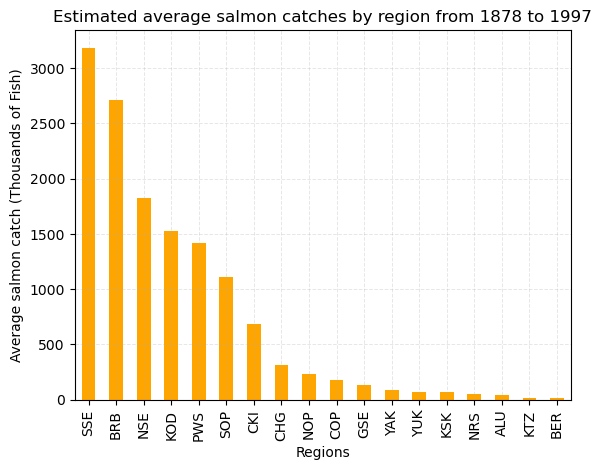

In [19]:
# Sort the values by ascending
avg_region_sorted = avg_region.sort_values(by = 'Catch', ascending = False)

# Data visualization of estimated average salmon catches by region from 1878 to 1997
avg_region_sorted.plot(kind='bar',
                       title='Estimated average salmon catches by region from 1878 to 1997',
                       xlabel='Regions',
                       ylabel='Average salmon catch (Thousands of Fish)',
                       color='orange',
                       legend=False)
plt.grid(True, alpha = 0.3, linestyle = '--', linewidth = 0.7)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## 10

Write a brief description with key takeaways from the plot. Your answer shuld use the complete names for the management areas instead of their codes. You can find what each code stands for in the [original data repository](https://knb.ecoinformatics.org/view/df35b.304.2#df35b.303.1).

The graph shows the estimated average salmon catches by region from 1878 to 1997. Southern Southeast Alaska (SSE) had the highest salmon catch, followed by Bristol Bay (BRB) and Northern Southeast Alaska (NSE). The region with the lowest catch was Bering River Subarea (BER).

The graph also shows changes in the ocean and fisheries over time. There was overfishing and poor management in the early years. In the 1970s, the development of modern scientific management ended high-seas fishing. Around the same time, large environmental changes increased Pacific salmon survival, leading to record catches in the mid-1990s. Salmon catch levels reflect changes in management, environmental conditions, fishing technology stocks productivity and catch reporting.

<!-- END QUESTION -->

## 11

Collect all the relevant code into the first blank cell of the notebook titled "COMPLETE WORKFLOW". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. Further guidance on what to include in this final workflow is in the [assignment rubric](https://docs.google.com/document/d/1x0BoU6IH4cnOR1-n7i9CYQ9wUC37yDpYlQ4j6rCfcsU/edit?tab=t.0).

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [20]:
grader.check_all()

q2a results: All test cases passed!

q2b results: All test cases passed!

q5 results: All test cases passed!

q7 results: All test cases passed!

q8 results: All test cases passed!